In [271]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [272]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [273]:
df = pd.read_csv("housing.csv")
df.head()
# The dataset contains the following columns:
# 1. longitude: A measure of how far west a house is; a higher value is farther west
# 2. latitude: A measure of how far north a house is; a higher value is farther north
# 3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
# 4. totalRooms: Total number of rooms within a block
# 5. totalBedrooms: Total number of bedrooms within a block
# 6. population: Total number of people residing within a block
# 7. households: Total number of households, a group of people residing within a home unit, for a block
# 8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
# 9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
# 10. oceanProximity: Location of the house w.r.t ocean/sea

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [274]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [275]:
# df["total_bedrooms"].fillna(df["total_bedrooms"].mean(), inplace=True)
# df.isnull().sum()

# df["total_bedrooms"].mean()
df.describe()

# df["total_bedrooms"].median()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [276]:
corr_df = df.corr(numeric_only=True)
corr_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

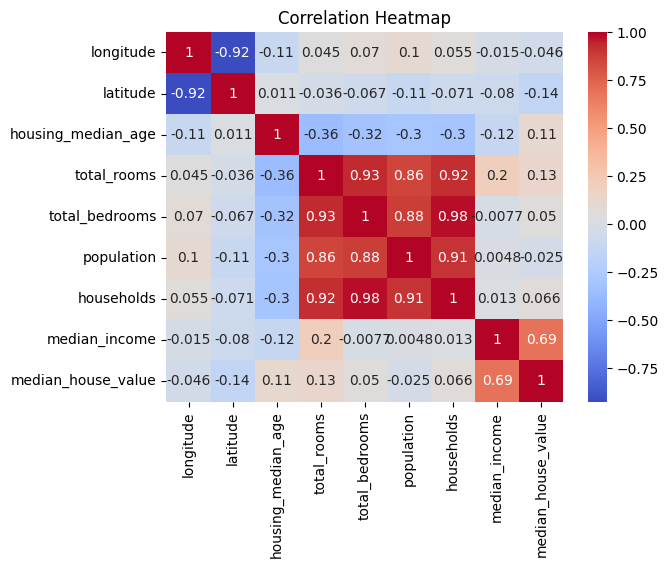

In [277]:
sns.heatmap(corr_df, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")

Text(0.5, 1.0, 'Boxplot of Total Rooms')

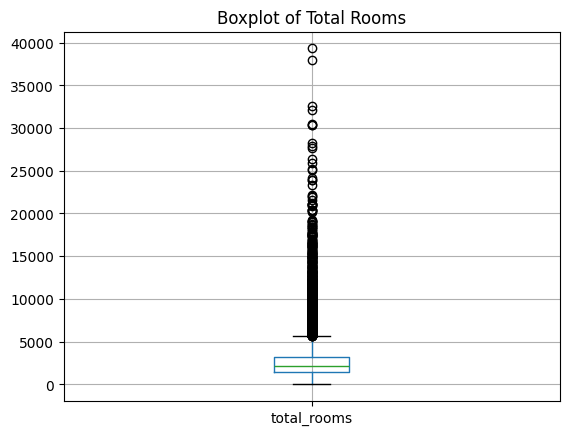

In [278]:
df.boxplot(column=["total_rooms"])
plt.title("Boxplot of Total Rooms")

Text(0.5, 1.02, 'Pairplot of Key Features')

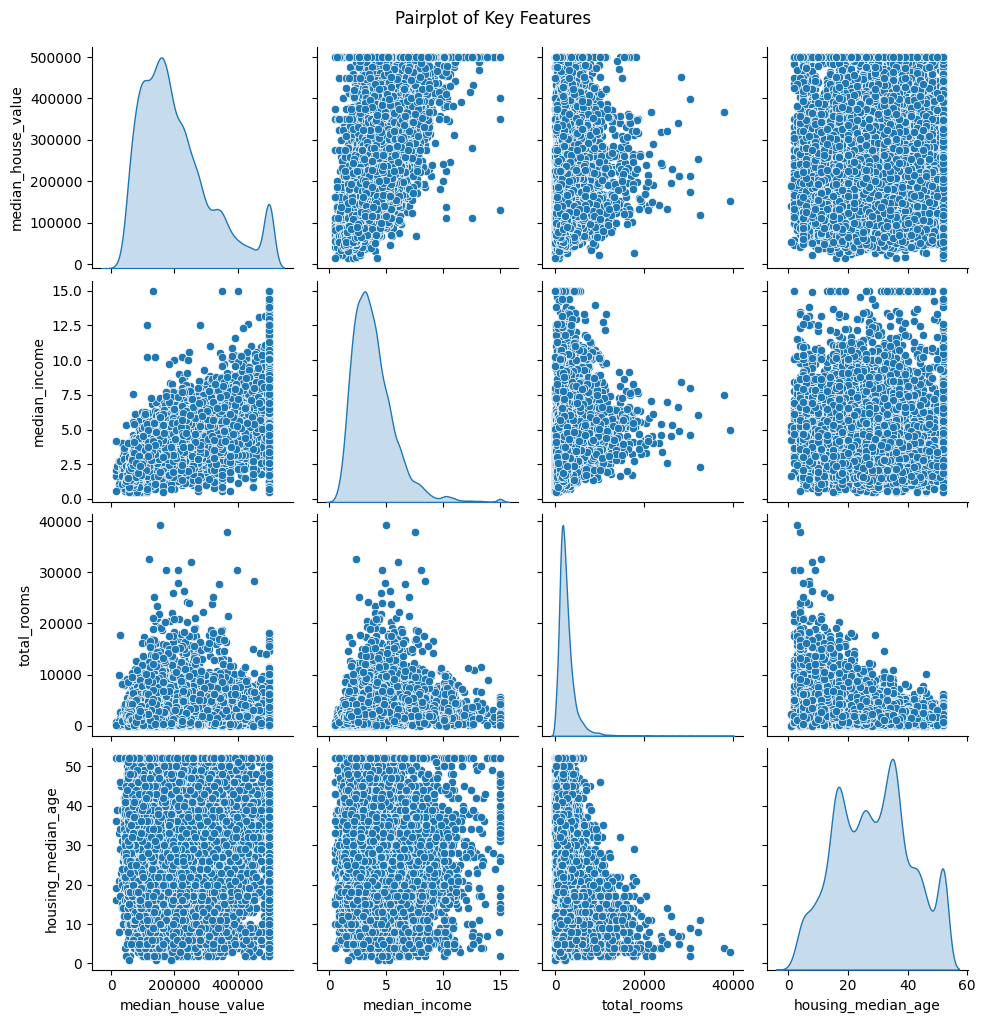

In [279]:
# Generate scatter plots for key feature relationships
sns.pairplot(df, vars=["median_house_value", "median_income", "total_rooms", "housing_median_age"], diag_kind="kde")
plt.suptitle("Pairplot of Key Features", y=1.02)

In [280]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [281]:
df[["total_bedrooms"]].describe()
df_without_null = df[df["total_bedrooms"].notnull()]
df["room_bedroom_ratio"] = df_without_null["total_rooms"] / df_without_null["total_bedrooms"]
df["room_bedroom_ratio"].describe()

count    20433.000000
mean         4.984829
std          1.171676
min          1.000000
25%          4.169782
50%          4.922170
75%          5.700364
max         10.000000
Name: room_bedroom_ratio, dtype: float64

In [282]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,room_bedroom_ratio
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.821705
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.418626
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,7.721053
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.421277
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,5.810714


In [283]:
room_bedroom_ratio_mean = df["room_bedroom_ratio"].mean()
df["imputed_bedroom"] = df["total_bedrooms"]
df["imputed_bedroom"].fillna(df["total_rooms"] / room_bedroom_ratio_mean, inplace=True)
df.isnull().sum()



C:\Users\Ravin Jangir\AppData\Local\Temp\ipykernel_32112\1740894352.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["imputed_bedroom"].fillna(df["total_rooms"] / room_bedroom_ratio_mean, inplace=True)


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
room_bedroom_ratio    207
imputed_bedroom         0
dtype: int64

In [284]:
df.describe().T[["min", "max"]]

,min,max
longitude,-124.3500,-114.3100
latitude,32.5400,41.9500
housing_median_age,1.0000,52.0000
total_rooms,2.0000,39320.0000
total_bedrooms,1.0000,6445.0000
population,3.0000,35682.0000
households,1.0000,6082.0000
median_income,0.4999,15.0001
median_house_value,14999.0000,500001.0000
room_bedroom_ratio,1.0000,10.0000


<Axes: xlabel='ocean_proximity'>

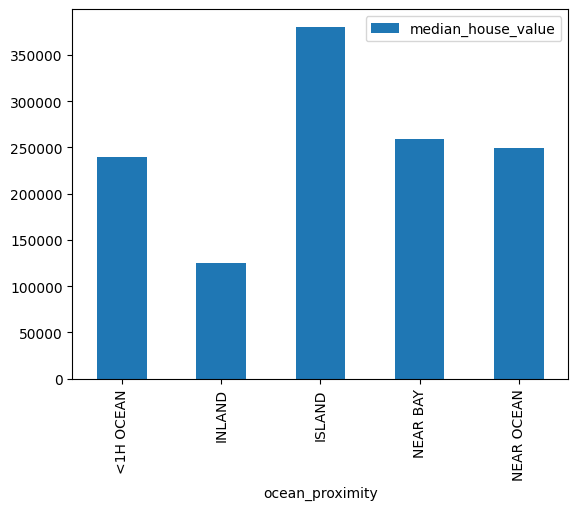

In [285]:
df[["ocean_proximity", "median_house_value"]].groupby("ocean_proximity").mean().reset_index().plot(kind="bar", x="ocean_proximity", y="median_house_value")

<Axes: xlabel='ocean_proximity'>

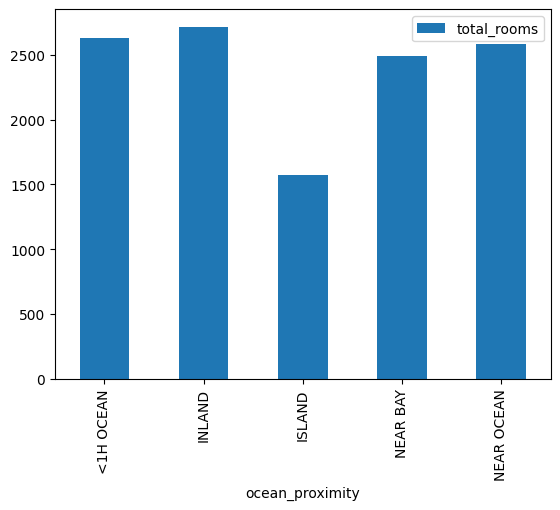

In [286]:
df[["ocean_proximity", "total_rooms"]].groupby(
    "ocean_proximity"
).mean().reset_index().plot(kind="bar", x="ocean_proximity", y="total_rooms")

In [287]:
def get_proximity_code(value):
    if "island" in value.lower():
        return 1
    else:
        return 0


df["ocean_proximity_code"] = df["ocean_proximity"].apply(get_proximity_code)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,room_bedroom_ratio,imputed_bedroom,ocean_proximity_code
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.821705,129.0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.418626,1106.0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,7.721053,190.0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.421277,235.0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,5.810714,280.0,0


,housing_median_age,total_rooms
housing_median_age,1.000000,-0.361262
total_rooms,-0.361262,1.000000


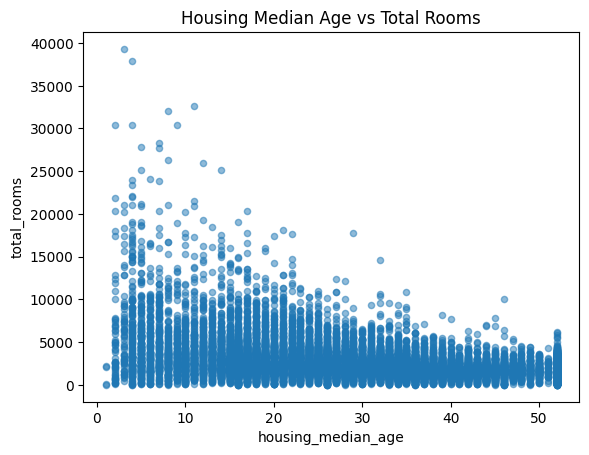

In [288]:
df_house_age_and_rooms = df[["housing_median_age", "total_rooms"]]
df_house_age_and_rooms.plot(kind="scatter", x="housing_median_age", y="total_rooms", alpha=0.5)
plt.title("Housing Median Age vs Total Rooms")
df_house_age_and_rooms.corr()

In [289]:
df.corr(numeric_only=True)
# df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room_bedroom_ratio,imputed_bedroom,ocean_proximity_code
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.079510,0.068443,0.009446
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,0.084902,-0.066124,-0.016572
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,-0.160853,-0.321461,0.017020
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,0.197684,0.930858,-0.007572
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,-0.090517,1.000000,-0.004361
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,-0.032065,0.877433,-0.010412
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.067736,0.978715,-0.009077
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,0.766578,-0.005694,-0.009228
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.383920,0.051281,0.023416
room_bedroom_ratio,-0.079510,0.084902,-0.160853,0.197684,-0.090517,-0.032065,-0.067736,0.766578,0.383920,1.000000,-0.090517,-0.017211


In [290]:
df.corr(method="spearman", numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room_bedroom_ratio,imputed_bedroom,ocean_proximity_code
longitude,1.000000,-0.879203,-0.150752,0.040120,0.063879,0.123527,0.060020,-0.009928,-0.069667,-0.050255,0.062528,0.003560
latitude,-0.879203,1.000000,0.032440,-0.018435,-0.056636,-0.123626,-0.074299,-0.088029,-0.165739,0.091648,-0.055363,-0.022495
housing_median_age,-0.150752,0.032440,1.000000,-0.357162,-0.306544,-0.283879,-0.281989,-0.147308,0.074855,-0.161693,-0.308123,0.014815
total_rooms,0.040120,-0.018435,-0.357162,1.000000,0.915021,0.816185,0.906734,0.271321,0.205952,0.229322,0.916118,-0.009910
total_bedrooms,0.063879,-0.056636,-0.306544,0.915021,1.000000,0.870937,0.975627,-0.006196,0.086259,-0.132796,1.000000,-0.002767
population,0.123527,-0.123626,-0.283879,0.816185,0.870937,1.000000,0.903872,0.006268,0.003839,-0.072503,0.870727,-0.016021
households,0.060020,-0.074299,-0.281989,0.906734,0.975627,0.903872,1.000000,0.030305,0.112737,-0.097036,0.974987,-0.012710
median_income,-0.009928,-0.088029,-0.147308,0.271321,-0.006196,0.006268,0.030305,1.000000,0.676778,0.744571,-0.002390,-0.010779
median_house_value,-0.069667,-0.165739,0.074855,0.205952,0.086259,0.003839,0.112737,0.676778,1.000000,0.331693,0.088458,0.020577
room_bedroom_ratio,-0.050255,0.091648,-0.161693,0.229322,-0.132796,-0.072503,-0.097036,0.744571,0.331693,1.000000,-0.132796,-0.019491


Text(0.5, 1.0, 'Correlation Heatmap')

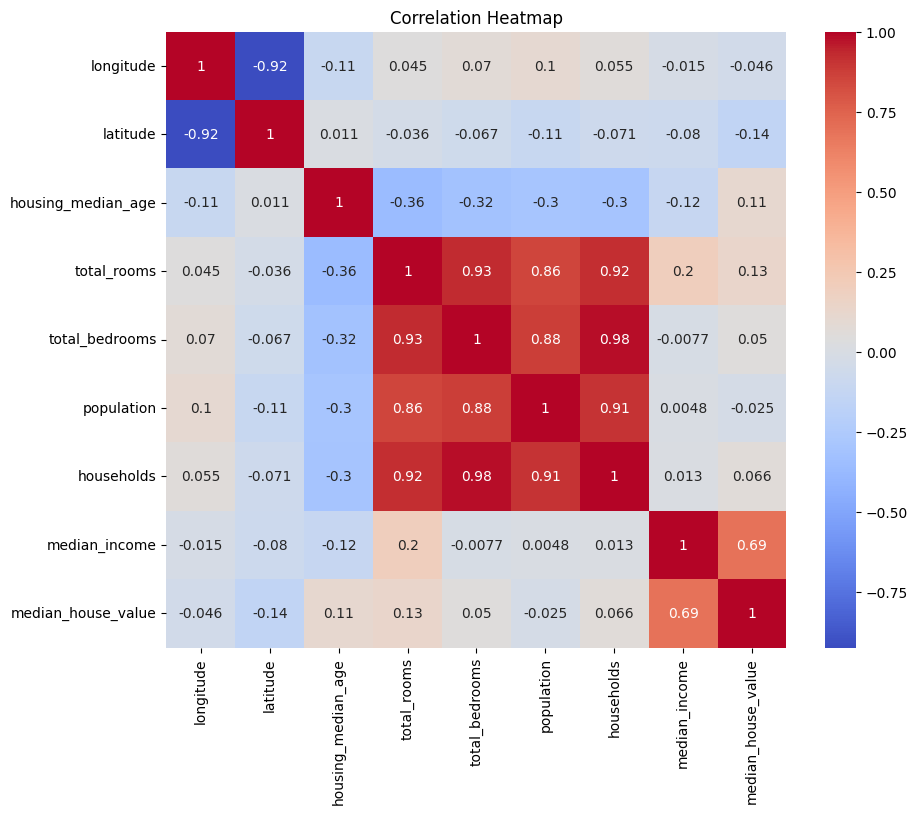

In [291]:

plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")

In [292]:
# perform mix max scaling on the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[["median_income", "total_rooms", "housing_median_age", "ocean_proximity_code"]])
scaled_df = pd.DataFrame(scaled_features, columns=["median_income", "total_rooms", "housing_median_age", "ocean_proximity_code"])
scaled_df.head()

,median_income,total_rooms,housing_median_age,ocean_proximity_code
0,0.539668,0.022331,0.784314,0.0
1,0.538027,0.180503,0.392157,0.0
2,0.466028,0.037260,1.000000,0.0
3,0.354699,0.032352,1.000000,0.0
4,0.230776,0.041330,1.000000,0.0


In [293]:
# change ocean proximity_code to one hot encoding
ocean_proximity_dummies = pd.get_dummies(
    df["ocean_proximity"], prefix="ocean_proximity", drop_first=True
).astype(int)
df = pd.concat([df, ocean_proximity_dummies], axis=1)

In [294]:
df = df.drop(columns=["ocean_proximity", "ocean_proximity_code", "room_bedroom_ratio", "total_bedrooms"])

In [295]:
df

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,imputed_bedroom,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,129.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,1106.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,190.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,235.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,280.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,845.0,330.0,1.5603,78100.0,374.0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,356.0,114.0,2.5568,77100.0,150.0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,1007.0,433.0,1.7000,92300.0,485.0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,741.0,349.0,1.8672,84700.0,409.0,1,0,0,0


In [296]:
# now do min max scaling on the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])
df.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,imputed_bedroom,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.211155,0.567481,0.784314,0.022331,0.008941,0.020556,0.539668,0.902266,0.019863,0.0,0.0,1.0,0.0
1,0.212151,0.565356,0.392157,0.180503,0.067210,0.186976,0.538027,0.708247,0.171477,0.0,0.0,1.0,0.0
2,0.210159,0.564293,1.000000,0.037260,0.013818,0.028943,0.466028,0.695051,0.029330,0.0,0.0,1.0,0.0
3,0.209163,0.564293,1.000000,0.032352,0.015555,0.035849,0.354699,0.672783,0.036313,0.0,0.0,1.0,0.0
4,0.209163,0.564293,1.000000,0.041330,0.015752,0.042427,0.230776,0.674638,0.043296,0.0,0.0,1.0,0.0


In [297]:
df.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,imputed_bedroom,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
longitude,1.000000,-0.924664,-0.108197,0.044568,0.099773,0.055310,-0.015176,-0.045967,0.068443,-0.055575,0.009446,-0.474489,0.045509
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.108785,-0.071035,-0.079809,-0.144160,-0.066124,0.351166,-0.016572,0.358771,-0.160818
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.296244,-0.302916,-0.119034,0.105623,-0.321461,-0.236645,0.017020,0.255172,0.021622
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.857126,0.918484,0.198050,0.134153,0.930858,0.025624,-0.007572,-0.023022,-0.009175
population,0.099773,-0.108785,-0.296244,0.857126,1.000000,0.907222,0.004834,-0.024650,0.877433,-0.020732,-0.010412,-0.060880,-0.024264
households,0.055310,-0.071035,-0.302916,0.918484,0.907222,1.000000,0.013033,0.065843,0.978715,-0.039402,-0.009077,-0.010093,0.001714
median_income,-0.015176,-0.079809,-0.119034,0.198050,0.004834,0.013033,1.000000,0.688075,-0.005694,-0.237496,-0.009228,0.056197,0.027344
median_house_value,-0.045967,-0.144160,0.105623,0.134153,-0.024650,0.065843,0.688075,1.000000,0.051281,-0.484859,0.023416,0.160284,0.141862
imputed_bedroom,0.068443,-0.066124,-0.321461,0.930858,0.877433,0.978715,-0.005694,0.051281,1.000000,-0.007055,-0.004337,-0.019245,0.000062
ocean_proximity_INLAND,-0.055575,0.351166,-0.236645,0.025624,-0.020732,-0.039402,-0.237496,-0.484859,-0.007055,1.000000,-0.010614,-0.240887,-0.262163


Text(0.5, 1.0, 'Correlation Heatmap')

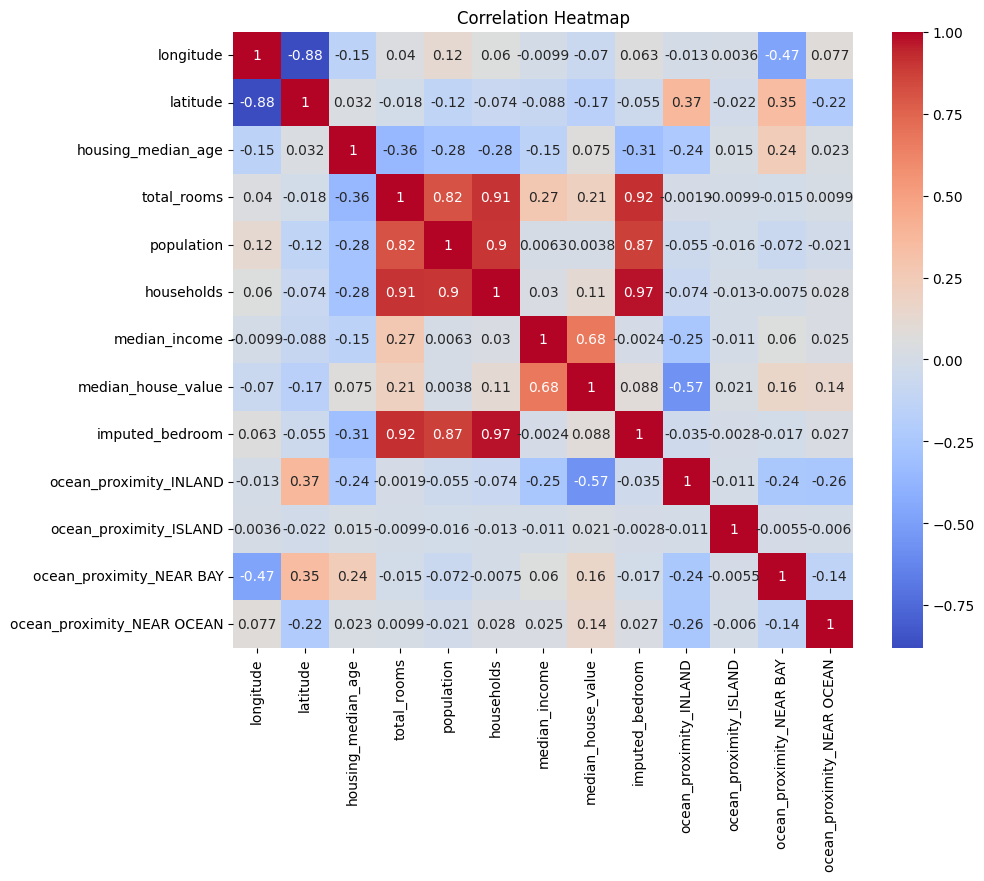

In [298]:
spearnman_df = df.corr(method="spearman", numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(spearnman_df, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")

In [299]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error


X = df.drop(columns=["median_house_value"])
y = df["median_house_value"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred


array([0.05232315, 0.25814105, 0.56649932, ..., 0.87459842, 0.21814045,
       0.34718836], shape=(4128,))

In [300]:
y_pred

array([0.05232315, 0.25814105, 0.56649932, ..., 0.87459842, 0.21814045,
       0.34718836], shape=(4128,))

In [301]:
model.coef_

array([-0.55557764, -0.4941365 ,  0.1158994 , -0.48814966, -2.80817631,
        0.60499748,  1.18016118,  1.36571574, -0.082034  ,  0.2806691 ,
       -0.01059097,  0.00707449])

In [302]:
model.intercept_

np.float64(0.49260094213787925)

In [303]:
lr_mae = mean_absolute_error(y_test, y_pred)   
lr_mse = mean_squared_error(y_test, y_pred)
lr_rmse = root_mean_squared_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)

In [304]:
mae

0.1036500180041555

In [305]:
mse

0.020490787276533935

In [306]:
rmse

0.14314603479151608

In [307]:
lr_r2

0.632177032562586

In [308]:
# Compare with a Ridge regression model (alpha=1.0)
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_ridge


array([0.06296655, 0.2528211 , 0.54824959, ..., 0.87321084, 0.21738718,
       0.35414778], shape=(4128,))

In [309]:
ridge_model.coef_


array([-0.52086501, -0.4598915 ,  0.11564173, -0.35790313, -2.07877486,
        0.42245507,  1.16449382,  1.10521348, -0.08736017,  0.23255717,
       -0.00624265,  0.01068154])

In [310]:
ridge_model.intercept_

np.float64(0.4682318953345753)

In [311]:
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)   
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_rmse = root_mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

In [313]:
print("Linear Regression Metrics vs Ridge Regression Metrics")
print(f"MAE: {lr_mae} vs {ridge_mae}")
print(f"MSE: {lr_mse} vs {ridge_mse}")
print(f"RMSE: {lr_rmse} vs {ridge_rmse}")
print(f"R2: {lr_r2} vs {ridge_r2}")


Linear Regression Metrics vs Ridge Regression Metrics
MAE: 0.1036500180041555 vs 0.10378912306470195
MSE: 0.020490787276533935 vs 0.020574733275968017
RMSE: 0.14314603479151608 vs 0.14343895313326857
R2: 0.632177032562586 vs 0.6306701472389702
